<a href="https://colab.research.google.com/github/snovamo86861/MachineLearning/blob/master/Red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

#Ejercicio: Vision de computadora 
import torch
import torch.nn as nn
import torch.optim as optim

from torchvision import utils
from torchvision import datasets
from torchvision import transforms

from PIL import Image
import urllib.request as request
from matplotlib import pyplot as plt
#torch.set_printoptions(edgeitems=2) #default 3
#torch.manual_seed(123)

Construyendo un modelo

In [2]:
data_path = 'data/'
full_data_set = datasets.CIFAR10(data_path, train=True, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

full_validation_set = datasets.CIFAR10(data_path, train=False, download=True,
                          transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))
                          ]))

0it [00:00, ?it/s]

170500096it [00:02, 71187206.40it/s]                               


Extracting data/cifar-10-python.tar.gz to data/
Files already downloaded and verified


In [0]:
#Data loader
size = 4
dataloader = torch.utils.data.DataLoader(full_data_set, batch_size=size, shuffle=True, num_workers=2)

In [4]:
len(full_validation_set)

10000

In [5]:
len(full_data_set)

50000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


deer
dog
truck
horse


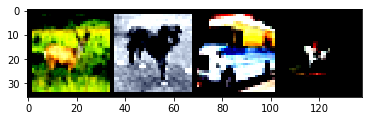

In [6]:
data_iterator = iter(dataloader)
imgs, labels = data_iterator.next()

classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']

plt.imshow(utils.make_grid(imgs).permute(1, 2, 0))

for i in range(size):
  print(classes[labels[i]])

In [0]:
#classes = ['plane','car','bird','cat','deer','dog','frog','horse','ship','truck']
class_names = ['car', 'cat']

label_map = {1: 0, 3: 1}

data_set = [(img, label_map[label]) for img, label in full_data_set if label in [1, 3]]
validation_set = [(img, label_map[label]) for img, label in full_validation_set if label in [1, 3]]

In [8]:
img, label = data_set[20]
img.shape

torch.Size([3, 32, 32])

In [0]:
#red neuro

model = nn.Sequential(
    nn.Linear(3 * 32 *32, 512),
    nn.Tanh(),
    nn.Linear(512, 2))

In [0]:
def softmax(x): #como resultado tendre 1 
    return torch.exp(x) / torch.exp(x).sum()

In [24]:
softmax(x)

tensor([[0.0450, 0.1224, 0.3326],
        [0.0450, 0.1224, 0.3326]])

In [25]:
softmax(x).sum()

tensor(1.)

In [26]:
softmax = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0],
                  [1.0, 2.0, 3.0]])

softmax(x)

tensor([[0.0900, 0.2447, 0.6652],
        [0.0900, 0.2447, 0.6652]])

In [0]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.Softmax(dim=1))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


'car'

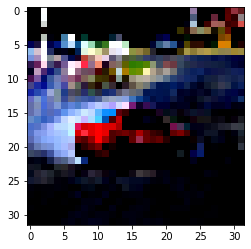

In [28]:
img, label = data_set[20]

plt.imshow(img.permute(1, 2, 0))
class_names[label]

In [21]:
out = model(img.view(-1).unsqueeze(0))
out

tensor([[0.5473, 0.4527]], grad_fn=<SoftmaxBackward>)

In [22]:
_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

-> car  model: car


Implementando un clasificador totalmente conectado

In [0]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

loss = nn.NLLLoss()

In [30]:
img, label = data_set[20]

out = model(img.view(-1).unsqueeze(0))
#print(out)
_, index = torch.max(out, dim=1)

print('->',class_names[label],' model:',class_names[index])

loss(out, torch.tensor([label]))

-> car  model: car


tensor(0.4960, grad_fn=<NllLossBackward>)

In [39]:
#construyendo loop

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1)
          )

loss_function = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
n_epochs = 5 #100

for epoch in range(n_epochs):
  for img, label in data_set:
      out = model(img.view(-1).unsqueeze(0))
      loss =loss_function(out, torch.tensor([label]))

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.003600
Epoch: 1, Loss: 0.148561
Epoch: 2, Loss: 0.579559
Epoch: 3, Loss: 0.000610
Epoch: 4, Loss: 0.255716


In [45]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))


optimizer = optim.SGD(model.parameters(), lr=0.02)

loss_function = nn.NLLLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_function(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.230570
Epoch: 1, Loss: 0.501353
Epoch: 2, Loss: 0.523029
Epoch: 3, Loss: 0.290014
Epoch: 4, Loss: 0.597987
Epoch: 5, Loss: 0.419392
Epoch: 6, Loss: 0.352151
Epoch: 7, Loss: 0.183619
Epoch: 8, Loss: 0.318046
Epoch: 9, Loss: 0.167017
Epoch: 10, Loss: 0.430793
Epoch: 11, Loss: 0.154773
Epoch: 12, Loss: 0.362383
Epoch: 13, Loss: 0.160937
Epoch: 14, Loss: 0.191247
Epoch: 15, Loss: 0.090759
Epoch: 16, Loss: 0.127275
Epoch: 17, Loss: 0.132593
Epoch: 18, Loss: 0.043094
Epoch: 19, Loss: 0.189368
Epoch: 20, Loss: 0.045862
Epoch: 21, Loss: 0.044824
Epoch: 22, Loss: 0.030080
Epoch: 23, Loss: 0.047230
Epoch: 24, Loss: 0.013001
Epoch: 25, Loss: 0.015183
Epoch: 26, Loss: 0.040776
Epoch: 27, Loss: 0.018876
Epoch: 28, Loss: 0.021620
Epoch: 29, Loss: 0.019367
Epoch: 30, Loss: 0.051680
Epoch: 31, Loss: 0.014789
Epoch: 32, Loss: 0.030303
Epoch: 33, Loss: 0.011555
Epoch: 34, Loss: 0.011650
Epoch: 35, Loss: 0.013570
Epoch: 36, Loss: 0.003078
Epoch: 37, Loss: 0.006138
Epoch: 38, Loss: 0.027

In [46]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad(): # no_grad es para ignorar los gradientes
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]

        correct += int((predicted == labels).sum())
      
print("Accuracy: %f" % (correct / total))

#Que tan bueno es el modelo

Accuracy: 0.867500


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  car  model: car


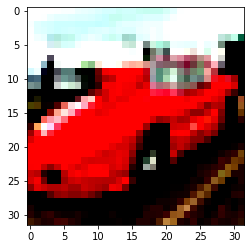

In [47]:
img, label = validation_set[20]
out = model(img.view(-1).unsqueeze(0))
_, index = torch.max(out, dim=1)
out

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


->:  car  model: car


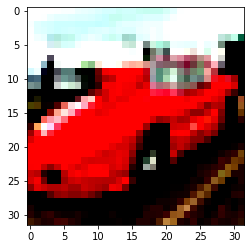

In [48]:

print('->: ',class_names[label],' model:',class_names[index])
plt.imshow(img.permute(1, 2, 0))
plt.show()

**Mejoras, limitaciones y conclusiones**

In [49]:
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=True)

model = nn.Sequential(
            nn.Linear(3072, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512), #agregamos otra transformacion linear.
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 0.01

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss() #loss calculado con algorithms negativos tiene 
#un efecto de CrossEntropyLoss

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.582472
Epoch: 1, Loss: 0.421379
Epoch: 2, Loss: 0.857895
Epoch: 3, Loss: 0.438767
Epoch: 4, Loss: 0.350848
Epoch: 5, Loss: 0.350863
Epoch: 6, Loss: 0.341924
Epoch: 7, Loss: 0.412185
Epoch: 8, Loss: 0.309569
Epoch: 9, Loss: 0.271916
Epoch: 10, Loss: 0.543917
Epoch: 11, Loss: 0.072554
Epoch: 12, Loss: 0.236930
Epoch: 13, Loss: 0.278091
Epoch: 14, Loss: 0.233913
Epoch: 15, Loss: 0.073121
Epoch: 16, Loss: 0.157012
Epoch: 17, Loss: 0.185323
Epoch: 18, Loss: 0.357059
Epoch: 19, Loss: 0.074111
Epoch: 20, Loss: 0.226851
Epoch: 21, Loss: 0.077464
Epoch: 22, Loss: 0.290110
Epoch: 23, Loss: 0.095834
Epoch: 24, Loss: 0.119826
Epoch: 25, Loss: 0.076115
Epoch: 26, Loss: 0.180067
Epoch: 27, Loss: 0.042486
Epoch: 28, Loss: 0.065231
Epoch: 29, Loss: 0.096677
Epoch: 30, Loss: 0.009064
Epoch: 31, Loss: 0.035911
Epoch: 32, Loss: 0.060583
Epoch: 33, Loss: 0.161159
Epoch: 34, Loss: 0.006744
Epoch: 35, Loss: 0.002993
Epoch: 36, Loss: 0.005106
Epoch: 37, Loss: 0.005606
Epoch: 38, Loss: 0.012

KeyboardInterrupt: ignored

In [53]:
val_loader = torch.utils.data.DataLoader(validation_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.862000


In [54]:
#entrenamiento. Cuando estamos entrenando una red neuronal, no queremos que nos de
# como resultado 100, porque eso quiere decir que lo ha memorizado. 
train_loader = torch.utils.data.DataLoader(data_set, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000


In [51]:
#como podemos contar cuantos parametros tenemos? ya que el modelo tiene un problema de over-fitting

sum([p.numel() for p in model.parameters() if p.requires_grad == True])

3737474